## Quadratic Polynomials

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Uploading dataset
df = pd.read_csv('quadratic_complex.csv')
df

,a,b,c,x_real_part,x_imaginary_part
0,1.955207,-0.283769,-3.883455,0.072567,0.000000
1,3.328140,-5.581906,6.684727,0.838592,1.142502
2,1.338732,-8.560458,-6.004841,3.197226,0.000000
3,3.467600,2.893837,1.386290,-0.417268,0.475049
4,1.144451,6.096559,-2.794600,-2.663529,0.000000
...,...,...,...,...,...
49995,4.604023,5.725633,3.282495,-0.621808,0.571242
49996,4.934956,6.472932,-8.427617,-0.655825,0.000000
49997,3.376382,-7.780573,1.613311,1.152206,0.000000
49998,1.526379,-8.402459,2.611048,2.752416,0.000000


In [3]:
# First 5 rows
df.head()

,a,b,c,x_real_part,x_imaginary_part
0,1.955207,-0.283769,-3.883455,0.072567,0.000000
1,3.328140,-5.581906,6.684727,0.838592,1.142502
2,1.338732,-8.560458,-6.004841,3.197226,0.000000
3,3.467600,2.893837,1.386290,-0.417268,0.475049
4,1.144451,6.096559,-2.794600,-2.663529,0.000000


In [4]:
df.columns

Index(['a', 'b', 'c', 'x_real_part', 'x_imaginary_part'], dtype='object')

In [5]:
# Checking for missing values
df.isnull().sum()

a                   0
b                   0
c                   0
x_real_part         0
x_imaginary_part    0
dtype: int64

In [10]:
import warnings
warnings.filterwarnings("ignore")

## Importing Required Libraries

 Importing  the necessary libraries for:

- Data splitting
- Data normalization
- Building and training the neural network model

### Libraries Used

- **train_test_split**  
  Used to divide the dataset into training and testing sets.  
  This allows to evaluate the model on unseen data.

- **StandardScaler**  
  Used to normalize the input features.  
  Neural networks perform better when inputs are scaled to a similar range.

- **TensorFlow / Keras**  
  Used to build and train the neural network model.

    - `Sequential` → Creates a feedforward neural network.
    - `Dense` → Fully connected layers used in the model architecture.


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Data Preparation

- **Inputs (X):** real and imaginary parts of the roots  
- **Outputs (y):** coefficients (a, b, c)

The dataset is split into:
- 80% training data
- 20% testing data

**StandardScaler** to normalize both inputs and outputs.  
Scaling improves training stability and helps the neural network converge faster.


In [12]:
# Inputs (roots)
X = df[['x_real_part','x_imaginary_part']].values
# Outputs (coefficients)
y = df[['a','b','c']].values
# Train/test split
X_train ,X_test ,y_train ,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
# Normalize inputs and outputs for better training
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

## Model Architecture

 Constructing a feedforward neural network using Keras' **Sequential** API.

### Input Layer
- Shape: (2,)
- Represents the real and imaginary parts of the complex root.
- Each sample contains two numerical features.

### Hidden Layers
- Two Dense layers with 64 neurons each.
- Activation function: **ReLU (Rectified Linear Unit)**.
- These layers allow the network to learn nonlinear relationships
  between the roots and the quadratic coefficients.

Using multiple hidden layers increases the model’s capacity to
approximate complex mappings in the data.

### Output Layer
- 3 neurons (no activation function).
- Predicts the coefficients (a, b, c).
- Since this is a regression problem,  do not use an activation
  like softmax or sigmoid in the final layer.
  This allows the model to predict any real-valued number for the coefficients (a, b, c).

This architecture enables the model to learn the mapping:

(real part, imaginary part) → (a, b, c)


In [40]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(2,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3)  # Linear output (default)
])

## Model Compilation and Training

###  Model Compilation

 Compiling the model before training with:

- **Optimizer: Adam**  
  - Adaptive optimizer that adjusts learning rates automatically.  
  - Popular choice for most neural network regression problems.  

- **Loss Function: Mean Squared Error (MSE)**  
  - Measures the average squared difference between predicted and true coefficients.  
  - Lower MSE → better predictions.  
  - Suitable for regression tasks where outputs are continuous numbers.

---

###  Model Training (`fit`)

- **X_train, y_train:** training data  
- **Epochs: 100** → the model will see the entire training set 100 times  
- **Batch size: 32** → number of samples processed before updating weights  
- **Validation split: 0.2** → 20% of training data is used to evaluate performance during training

During training, the model learns to map:
- (real part, imaginary part) → (a, b, c)

Validation helps monitor overfitting:  
- Training loss decreases → model is learning  
- Validation loss increases → model may start overfitting


In [41]:
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - loss: 0.3429 - val_loss: 0.3174
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - loss: 0.3139 - val_loss: 0.3120
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.3119 - val_loss: 0.3088
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.3109 - val_loss: 0.3051
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.3096 - val_loss: 0.3052
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.3094 - val_loss: 0.3043
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - loss: 0.3088 - val_loss: 0.3090
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - loss: 0.3086 - val_loss: 0.3026
Epoch 9/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 0.3083 - val_loss: 0.3042
Epoch 10/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 0.3078 - val_loss: 0.3017
Epoch 11/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.3074 - val_loss: 0.30

## Visualizing Training and Validation Loss

 The `history` object returned by `model.fit()` to visualize how the model learned over time.

- **Training Loss (`loss`)**  
  Shows how well the model fits the training data at each epoch.

- **Validation Loss (`val_loss`)**  
  Measures performance on unseen data (20% split from training set).  
  Helps detect overfitting.

### What to Look For:

- Both losses decreasing → model is learning.  
- Validation loss increasing while training loss decreases → possible overfitting.  
- Loss curves flatten → model has converged.

This plot gives insight into how fast the network learns and whether it generalizes well.


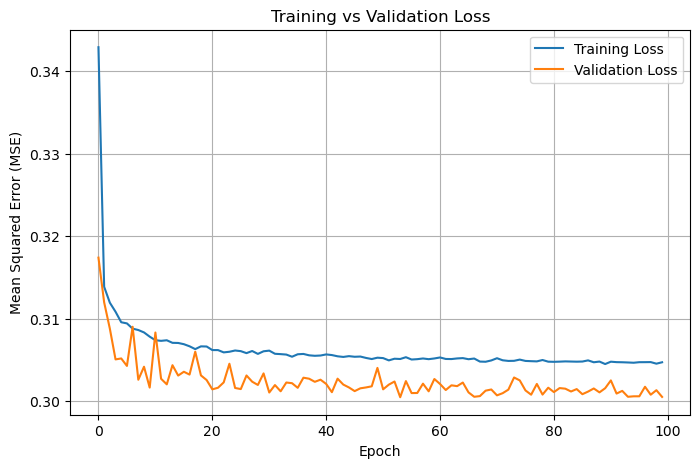

In [42]:
# Assume 'history' is from model.fit()
# history.history contains 'loss' and 'val_loss'

plt.figure(figsize=(8,5))

# Training loss
plt.plot(history.history['loss'], label='Training Loss')

# Validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Model Evaluation on Test Data

Evaluating the model on the unseen test set to measure its generalization.

- **`X_test`, `y_test`** → the input and true output for the test set  
- **`model.evaluate()`** → computes the loss (MSE) on the test data  
- **Test Loss** → lower values indicate the model predicts the coefficients more accurately

This step confirms how well the neural network can predict quadratic coefficients for new, unseen roots.


In [43]:
# Evaluate
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.6f}")

Test Loss: 0.305445


## Predicting a Quadratic Equation

- Select a **sample root** from the test set (`X_test[0]`).  
- Reshape the input for the model.  
- Use the trained neural network to **predict the scaled coefficients**.  
- Apply the **inverse transform** of the scaler to get the original coefficients (a, b, c).  
- Print the predicted quadratic equation in standard form (ax² + bx + c = 0)

In [44]:
# Make predictions
sample_input = X_test[0].reshape(1, -1)
pred_scaled = model.predict(sample_input)
pred_coeff = scaler_y.inverse_transform(pred_scaled)[0]
a_pred, b_pred, c_pred = pred_coeff
print(f"Predicted equation: {a_pred}*x^2 + {b_pred}*x + {c_pred} = 0")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
Predicted equation: 2.395261526107788*x^2 + 6.997365951538086*x + -2.4298923015594482 = 0


## Predicting Multiple Quadratic Equations

- Predicting 10 sample equations from the test set.  
- Steps for each sample:

  1. Select a root (`X_test[i]`) and reshape it for the model.  
  2. Predict the scaled coefficients using the trained neural network.  
  3. Apply the inverse scaler to get the original coefficients (a, b, c).  
  4. Format the output nicely with **two decimal places**, handling positive and negative signs.  
  5. Print the predicted quadratic equation in standard form:  ` ax² + bx + c = 0 `
     

This allows quick visualization of how well the model predicts multiple equations.


In [45]:
num_samples = 10

for i in range(num_samples):
    sample_input = X_test[i].reshape(1, -1)
    pred_scaled = model.predict(sample_input, verbose=0)
    pred_coeff = scaler_y.inverse_transform(pred_scaled)[0]
    
    a_pred, b_pred, c_pred = pred_coeff
    
    print(
        f"Predicted equation {i+1}: "
        f"{a_pred:.2f}*x^2 "
        f"{'+' if b_pred >= 0 else '-'} {abs(b_pred):.2f}*x "
        f"{'+' if c_pred >= 0 else '-'} {abs(c_pred):.2f} = 0"
    )

Predicted equation 1: 2.40*x^2 + 7.00*x - 2.43 = 0
Predicted equation 2: 3.53*x^2 + 6.36*x - 3.68 = 0
Predicted equation 3: 2.31*x^2 + 7.08*x - 2.25 = 0
Predicted equation 4: 3.49*x^2 + 7.12*x + 4.31 = 0
Predicted equation 5: 3.41*x^2 + 2.04*x - 4.85 = 0
Predicted equation 6: 0.74*x^2 + 8.03*x - 0.08 = 0
Predicted equation 7: 1.22*x^2 + 4.13*x + 7.44 = 0
Predicted equation 8: 3.53*x^2 + 6.38*x - 3.67 = 0
Predicted equation 9: 3.44*x^2 + 2.91*x - 4.63 = 0
Predicted equation 10: 3.48*x^2 + 6.59*x - 3.51 = 0


In [46]:
print(
    f"{a_pred:.1f}*x^2 "
    f"{'+' if b_pred >= 0 else '-'} {abs(b_pred):.1f}*x "
    f"{'+' if c_pred >= 0 else '-'} {abs(c_pred):.1f} = 0"
)

3.5*x^2 + 6.6*x - 3.5 = 0


In [47]:
a_pred = round(a_pred)
b_pred = round(b_pred)
c_pred = round(c_pred)

print(
    f"{a_pred}*x^2 "
    f"{'+' if b_pred >= 0 else '-'} {abs(b_pred)}*x "
    f"{'+' if c_pred >= 0 else '-'} {abs(c_pred)} = 0"
)

3*x^2 + 7*x - 4 = 0


In [56]:
# model architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,043 (297.05 KB)

 Trainable params: 25,347 (99.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,696 (198.04 KB)

## Calculating Mean Squared Error (MSE) on Test Set

**`mean_squared_error`** from scikit-learn to evaluate the model’s performance:

- **Inputs:**  
  - `y_test` → true coefficients of the test set  
  - `model.predict(X_test)` → predicted coefficients from the model  

- **MSE (Mean Squared Error):**  
  Measures the average squared difference between predicted and true coefficients.  
  - Lower MSE → predictions are closer to the true values.  
  - Helps quantify how accurately the model predicts quadratic coefficients.


In [48]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE:", mse)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
MSE: 0.30544502720403266


In [ ]:
##

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


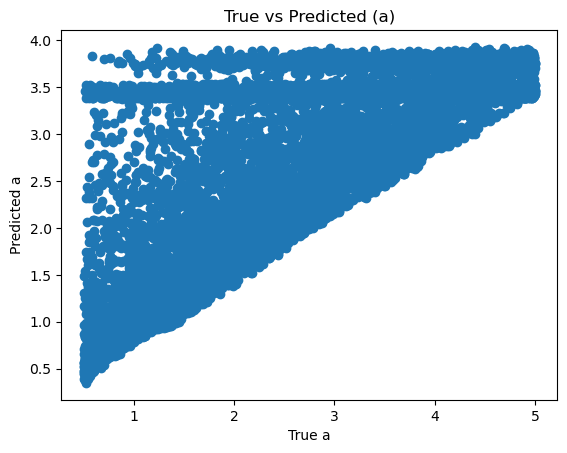

In [52]:
# Get predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_true_inv = scaler_y.inverse_transform(y_test)

# Plot coefficient a
plt.figure()
plt.scatter(y_true_inv[:, 0], y_pred_inv[:, 0])
plt.xlabel("True a")
plt.ylabel("Predicted a")
plt.title("True vs Predicted (a)")
plt.show()